$\dfrac{\partial}{\partial x} \left( \dfrac{\partial c^2 U}{\partial x} \right) = \dfrac{\partial^2 U}{\partial t^2}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [45]:
import numpy as np

def vibrating_string(L, N, c, dt, T, psi):
    # Initialization
    dx = L / N
    psi_new = np.zeros(N+1)  # Wave function at next step
    psi_old = np.zeros(N+1)  # Wave function at previous step
    psi = np.copy(psi)  # Ensure psi is not modified outside

    # Set initial condition is assumed to be done outside this function

    # First time step (could be refined for specific initial velocity conditions)
    for i in range(1, N):
        psi_new[i] = psi[i] + 0.5 * (c * dt / dx) ** 2 * (psi[i+1] + psi[i-1] - 2 * psi[i])
    psi_old, psi = psi, psi_new  # Prepare for next step

    # Time evolution
    time_steps = int(T / dt)
    for _ in range(1, time_steps):
        psi_old, psi = psi, np.copy(psi_new) 
        for i in range(1, N):
            psi_new[i] = 2 * psi[i] - psi_old[i] + (c * dt / dx) ** 2 * (psi[i+1] + psi[i-1] - 2 * psi[i])

        # Apply boundary conditions
        psi_new[0], psi_new[N] = 0, 0  # Fixed ends

    return psi_new



In [53]:
# Simulation parameters
L = 1.0      # Length of the string
N = 100      # Number of intervals (N+1 points)
c = 1.0      # Wave speed
dt = 0.001   # Time step
# T = 90.0      # Total time of simulation

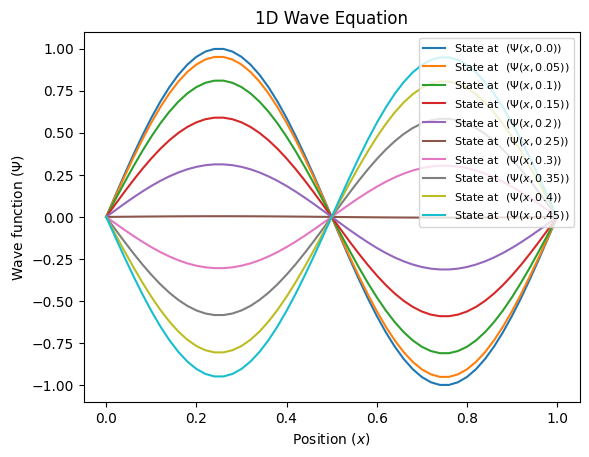

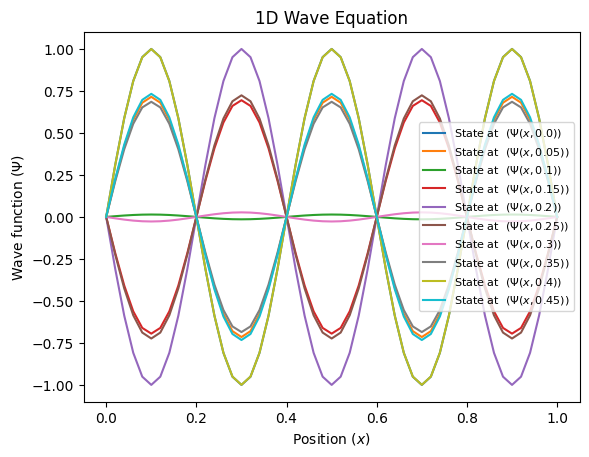

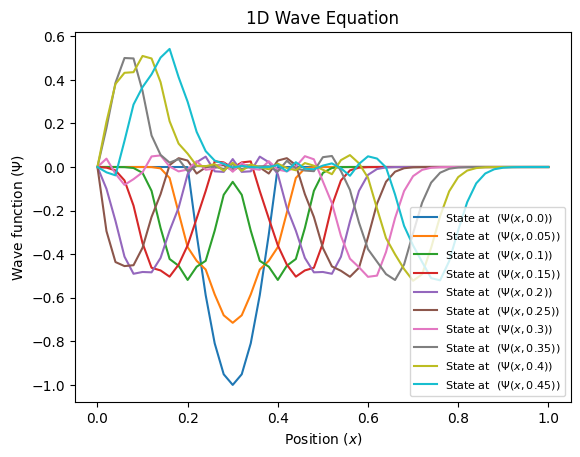

In [61]:
xs = np.linspace(0, L, N+1)  # Position array

def timestepping(xs):
    i = np.sin(2*np.pi*xs)
    ii = np.sin(5*np.pi*xs)
    iii = []
    for x in xs:
        if x > 1/5 and x < 2/5:
            iii.append(np.sin(5*np.pi*x))
        else: 
            iii.append(0)

    psis = [i, ii, iii]
    return psis

psis = timestepping(xs)
for psi in psis:
    for T in np.arange(0, 0.5, 0.05):
        psi_new = vibrating_string(L, N, c, dt, T, psi)

        # Plot the final state
        plt.plot(xs, psi_new, label=f'State at  ($\Psi(x, {np.round(T, 2)})$)')
    plt.xlabel('Position ($x$)')
    plt.ylabel('Wave function ($\Psi$)')
    plt.title('1D Wave Equation')
    plt.legend(fontsize = 8)
    plt.show()

In [62]:
# Prepare individual figure for each psi
for idx, psi in enumerate(psis):
    fig, ax = plt.subplots()
    ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
    
    # Initial line for this psi
    line, = ax.plot(xs, psi, label=f'Initial state $\Psi_{idx}(x, 0)$')
    ax.legend(fontsize=8)
    
    # Animation function for this psi
    def animate(T, idx=idx, line=line):  # Capture current 'idx' and 'line' in the closure
        psi_new = vibrating_string(L, N, c, dt, T, psi)
        line.set_ydata(psi_new)
        ax.set_title(f'1D Wave Equation at T={T:.2f} for $\Psi_{idx}(x, 0)$')
    
    # Create animation for this psi
    ani = FuncAnimation(fig, animate, frames=np.arange(0, 30, 1), interval=100)
    ani.save(f'animation_psi_{idx}.gif', writer=PillowWriter(fps=10))

    plt.close(fig)  # Close the figure to prevent it from displaying inline


# 1.2


# D


# E

In [6]:
# import os

# # Parameters
# D = 1.0  # Diffusion constant
# L = 1.0  # Length of the domain in both x and y directions
# N = 100  # Number of intervals in each direction, hence N+1 grid points
# dx = L / N
# dt = (dx**2) / (4 * D)  # Time step, chosen based on stability criterion
# total_time = 1.0
# iterations = int((total_time / dt) / 40)
# print(iterations)
# save_every = 100  # Save data every 100 iterations

# # Initialize concentration field
# c = np.zeros((N+1, N+1))

# # Apply initial condition
# # Assuming initial condition is already satisfied by zeros
# # Apply boundary conditions
# c[:, 0] = 0  # Bottom boundary
# c[:, N] = 1  # Top boundary

# # Simulation directory
# sim_dir = "simulation_data"
# if not os.path.exists(sim_dir):
#     os.makedirs(sim_dir)

# for k in range(iterations):
#     # Copy current state to avoid overwriting
#     c_new = np.copy(c)
    
#     # Update concentration field
#     for i in range(1, N):  # Exclude boundaries
#         for j in range(1, N):  # Exclude boundaries
#             c_new[i, j] = c[i, j] + dt * D / dx**2 * (
#                 c[i+1, j] + c[i-1, j] + c[i, j+1] + c[i, j-1] - 4*c[i, j]
#             )
    
#     # Apply periodic boundary conditions
#     c_new[0, :] = c_new[N-1, :]
#     c_new[N, :] = c_new[1, :]
    
#     c = np.copy(c_new)
    
#     # Save data to file every 100 iterations
#     if k % save_every == 0:
#         filename = os.path.join(sim_dir, f"concentration_at_iteration_{k}.csv")
#         np.savetxt(filename, c, delimiter=",")
#         print(f"Data saved to {filename} at iteration {k}")

# # Optionally, plot the final state
# plt.imshow(c, extent=[0, L, 0, L], origin='lower', cmap='hot')
# plt.colorbar(label='Concentration')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Concentration at Final State')
# plt.show()
